In [9]:
import pandas as pd
import numpy as np
import os
if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

import HappyML.preprocessor as pp

In [10]:
data = pp.dataset(file="ToyotaUsedCars.csv")
data

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,GT86,2016,Manual,24089,Petrol,265,36.2,2.0,16000
1,GT86,2017,Manual,18615,Petrol,145,36.2,2.0,15995
2,GT86,2015,Manual,27469,Petrol,265,36.2,2.0,13998
3,GT86,2017,Manual,14736,Petrol,150,36.2,2.0,18998
4,GT86,2017,Manual,36284,Petrol,145,36.2,2.0,17498
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,Automatic,30000,Petrol,20,58.9,1.0,5500
6734,Urban Cruiser,2011,Manual,36154,Petrol,125,50.4,1.3,4985
6735,Urban Cruiser,2012,Manual,46000,Diesel,125,57.6,1.4,4995
6736,Urban Cruiser,2011,Manual,60700,Petrol,125,50.4,1.3,3995


In [11]:
X, Y = pp.decomposition(data, x_columns =[i for i in range(8)],y_columns=[-1] )
X = pp.onehot_encoder(X,columns=[0,2,4])
X_train, X_test, Y_train, Y_test = pp.split_train_test(X, Y, train_size = 0.8, random_state = 0 )
X_train, X_test = pp.feature_scaling(X_train, transform_arys=(X_train, X_test))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(input_dim = X_train.shape[1], units = 150 , kernel_initializer = "glorot_normal", activation = "relu"))
model.add(Dense(units = 9, kernel_initializer = "glorot_normal",activation = "relu"))
model.add(Dense(units = 1, kernel_initializer = "glorot_normal", activation = "linear"))

model.compile(optimizer = "adam", loss = "mse", metrics = ["mse"])
epochs_metrics = model.fit(x = X_train, y = Y_train, validation_split = 0.2, batch_size = 5, epochs = 30)

Epoch 1/30
863/863 [==============================] - 2s 2ms/step - loss: 157299904.0000 - mse: 157299904.0000 - val_loss: 75691224.0000 - val_mse: 75691224.0000
Epoch 2/30
863/863 [==============================] - 1s 2ms/step - loss: 24068968.0000 - mse: 24068968.0000 - val_loss: 11333099.0000 - val_mse: 11333099.0000
Epoch 3/30
863/863 [==============================] - 2s 2ms/step - loss: 7450373.5000 - mse: 7450374.0000 - val_loss: 7684858.0000 - val_mse: 7684858.0000
Epoch 4/30
863/863 [==============================] - 1s 2ms/step - loss: 5525280.5000 - mse: 5525280.5000 - val_loss: 5829513.0000 - val_mse: 5829513.0000
Epoch 5/30
863/863 [==============================] - 1s 1ms/step - loss: 4465966.5000 - mse: 4465966.5000 - val_loss: 4700298.5000 - val_mse: 4700298.5000
Epoch 6/30
863/863 [==============================] - 1s 2ms/step - loss: 3754631.2500 - mse: 3754631.2500 - val_loss: 3871710.0000 - val_mse: 3871710.0000
Epoch 7/30
863/863 [==============================] - 

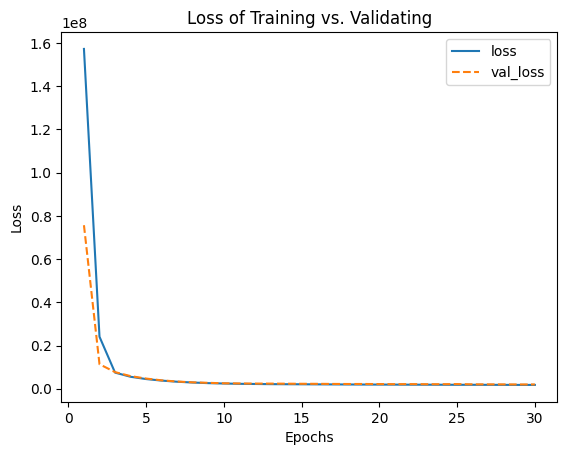

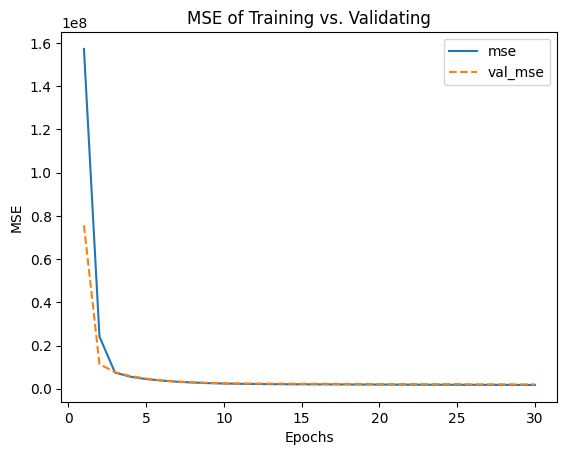

In [13]:
import HappyML.model_drawer as md

md.epochs_metrics_plot(epochs_metrics.history, keys = ("loss", "val_loss"),title="Loss of Training vs. Validating", xyLabel=("Epochs", "Loss"))
md.epochs_metrics_plot(epochs_metrics.history, keys=("mse", "val_mse"), title="MSE of Training vs. Validating", xyLabel=("Epochs", "MSE"))

In [14]:
Y_pred = pd.DataFrame(model.predict(x = X_test), index = Y_test.index, columns = Y_test.columns)
df = pd.concat([Y_test, Y_pred], axis = 1)
print(df)

43/43 [==============================] - 0s 965us/step
      price         price
2527  11295  11294.155273
134   18995  18327.660156
4844   8950   9906.980469
3638   9995  10117.127930
98    15990  18121.259766
...     ...           ...
3214  13998  15161.702148
1042  10495  10203.125977
1116   9233   9467.290039
5723  22498  23913.730469
1362  12295  11880.594727

[1348 rows x 2 columns]


In [15]:
test_loss, test_mse = model.evaluate(X_test, Y_test)
print("Loss of Testing Set:", test_loss)
print("MSE of Testing Set:", test_mse)

43/43 [==============================] - 0s 1ms/step - loss: 1735065.2500 - mse: 1735065.2500
Loss of Testing Set: 1735065.25
MSE of Testing Set: 1735065.25
